In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np_img=[]
for i in range(3):
  img = Image.open('/content/photo/Image_%i.png'%(i+1)).convert('L')

  np_img += [np.array(img)]
  np_img[i]= ~np_img[i]  # invert B&W
  np_img[i][np_img[i] > 0] = 1



In [8]:
img1=np_img[0]
img2=np_img[1]
img3=np_img[2]
img1 = img1.astype('int32')
img2 = img2.astype('int32')
img3 = img3.astype('int32')

In [9]:
img1[img1==0] = -1
img2[img2==0] = -1
img3[img3==0] = -1



In [10]:
class auto_associative_net:
    def __init__(self, S):
        self.S = S
        self.W = np.zeros((S.shape[0], S.shape[0]))

    def heb_train(self):
        S = self.S
        for i in range(S.shape[1]):
            s = S[:, i].reshape((S.shape[0], 1))
            self.W += s @ s.T
        return self.W
    def heb_train_modified(self):
        S = self.S
        for i in range(S.shape[1]):
            s = S[:, i].reshape((S.shape[0], 1))
            self.W += s @ s.T - np.eye(S.shape[0])
        return self.W
    
    def f (self, X):
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                X[i][j] = 1 if X[i][j] >= 0 else -1
        return X

    def out_put(self, sample):
        X = sample.reshape(-1, 1)
        return self.f(X.T @ self.W)

In [11]:
S = np.hstack((img1.reshape(-1, 1), img2.reshape(-1, 1), img3.reshape(-1, 1)))
S

array([[-1, -1, -1],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [ 1, -1,  1],
       [-1, -1, -1],
       [ 1, -1,  1],
       [-1,  1, -1],
       [-1,  1, -1],
       [-1, -1, -1],
       [ 1, -1,  1],
       [ 1, -1, -1],
       [-1, -1, -1],
       [-1,  1, -1],
       [-1, -1, -1],
       [ 1, -1,  1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1,  1,  1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [ 1, -1,  1],
       [-1, -1, -1],
       [-1,  1, -1],
       [-1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1,  1],
       [-1, -1, -1],
       [-1,  1, -1],
       [-1, -1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [-1, -1,  1]], dtype=int32)

In [12]:
model = auto_associative_net(S)
print(model.heb_train())
model1 = auto_associative_net(S)
print(model1.heb_train_modified())


[[ 3. -1. -3. ... -3. -3.  1.]
 [-1.  3.  1. ...  1.  1.  1.]
 [-3.  1.  3. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  3.  3. -1.]
 [-3.  1.  3. ...  3.  3. -1.]
 [ 1.  1. -1. ... -1. -1.  3.]]
[[ 0. -1. -3. ... -3. -3.  1.]
 [-1.  0.  1. ...  1.  1.  1.]
 [-3.  1.  0. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  0.  3. -1.]
 [-3.  1.  3. ...  3.  0. -1.]
 [ 1.  1. -1. ... -1. -1.  0.]]


In [13]:

def test_NET (predA, A):
    return np.sum(predA.reshape(A.shape) == A).astype('int') / (A.size)

similarity precent for letter A: 1.000000
similarity precent for letter B: 1.000000
similarity precent for letter C: 1.000000


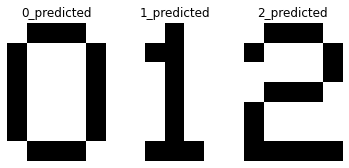

In [14]:
simA = test_NET(model1.out_put(img1), img1)
simB = test_NET(model1.out_put(img2), img2)
simC = test_NET(model1.out_put(img3), img3)
print('similarity precent for letter A: %f'%simA)
print('similarity precent for letter B: %f'%simB)
print('similarity precent for letter C: %f'%simC)
plt.subplot(131)
plt.imshow(model.out_put(img1).reshape(img1.shape), cmap='binary')
plt.axis('off')
plt.title('0_predicted')
plt.subplot(132)
plt.imshow(model.out_put(img2).reshape(img2.shape), cmap='binary')
plt.axis('off')
plt.title('1_predicted')
plt.subplot(133)
plt.imshow(model.out_put(img3).reshape(img3.shape), cmap='binary')
plt.axis('off')
plt.title('2_predicted')
plt.show()

similarity precent for letter A: 1.000000
similarity precent for letter B: 1.000000
similarity precent for letter C: 1.000000


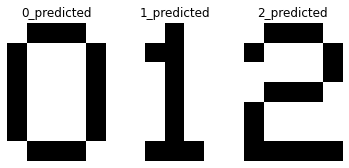

In [15]:
simA = test_NET(model.out_put(img1), img1)
simB = test_NET(model.out_put(img2), img2)
simC = test_NET(model.out_put(img3), img3)
print('similarity precent for letter A: %f'%simA)
print('similarity precent for letter B: %f'%simB)
print('similarity precent for letter C: %f'%simC)
plt.subplot(131)
plt.imshow(model.out_put(img1).reshape(img1.shape), cmap='binary')
plt.axis('off')
plt.title('0_predicted')
plt.subplot(132)
plt.imshow(model.out_put(img2).reshape(img2.shape), cmap='binary')
plt.axis('off')
plt.title('1_predicted')
plt.subplot(133)
plt.imshow(model.out_put(img3).reshape(img3.shape), cmap='binary')
plt.axis('off')
plt.title('2_predicted')
plt.show()

In [16]:
def Noise_Net(input, percent):
    noisyOutput = input.copy()
    choosenIndices = np.random.choice(noisyOutput.size, int(percent * noisyOutput.size / 100), replace=False)
    for index in choosenIndices:
        if noisyOutput[index] == 1:
            noisyOutput[index] = -1
        else:
            noisyOutput[index] = 1

    return noisyOutput

In [43]:
iteration = 0
pos1_20 = 0
pos2_20 = 0
pos3_20 = 0
pos1_80 = 0
pos2_80 = 0
pos3_80 = 0
while iteration < 100:
    noisy1_20 = Noise_Net(S[:, 0], 20)
    noisy1_80 = Noise_Net(S[:, 0], 80)
    noisy2_20 = Noise_Net(S[:, 1], 20)
    noisy2_80 = Noise_Net(S[:, 1], 80)
    noisy3_20 = Noise_Net(S[:, 2], 20)
    noisy3_80 = Noise_Net(S[:, 2], 80)

    pred1_20 = model.out_put(noisy1_20)
    pred1_80 = model.out_put(noisy1_80)
    pred2_20 = model.out_put(noisy2_20)
    pred2_80 = model.out_put(noisy2_80)
    pred3_20 = model.out_put(noisy3_20)
    pred3_80 = model.out_put(noisy3_80)

    if test_NET(pred1_20, img1) == 1  : pos1_20 += 1
    if test_NET(pred2_20, img2) == 1  : pos2_20 += 1
    if test_NET(pred3_20, img3) == 1  : pos3_20 += 1
    if test_NET(pred1_80, img1) == 1  : pos1_80 += 1
    if test_NET(pred2_80, img2) == 1  : pos2_80 += 1
    if test_NET(pred3_80, img3) == 1  : pos3_80 += 1    

    iteration += 1

acc1_20 = pos1_20 / 100
acc2_20 = pos2_20 / 100
acc3_20 = pos3_20 / 100
acc1_80 = pos1_80 / 100
acc2_80 = pos2_80 / 100
acc3_80 = pos3_80 / 100
print('khoroji sahih baray 0 ba 20 darsad noise %f darsad ast'%acc1_20)
print('khoroji sahih baray 1 ba 20 darsad noise %f darsad ast'%acc2_20)
print('khoroji sahih baray 2 ba 20 darsad noise %f darsad ast'%acc3_20)
print('khoroji sahih baray 0 ba 60 darsad noise %f darsad ast'%acc1_80)
print('khoroji sahih baray 1 ba 60 darsad noise %f darsad ast'%acc2_80)
print('khoroji sahih baray 2 ba 60 darsad noise %f darsad ast'%acc3_80)

khoroji sahih baray 0 ba 20 darsad noise 0.940000 darsad ast
khoroji sahih baray 1 ba 20 darsad noise 1.000000 darsad ast
khoroji sahih baray 2 ba 20 darsad noise 0.920000 darsad ast
khoroji sahih baray 0 ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray 1 ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray 2 ba 60 darsad noise 0.000000 darsad ast


In [44]:
iteration = 0
pos1_20 = 0
pos2_20 = 0
pos3_20 = 0
pos1_80 = 0
pos2_80 = 0
pos3_80 = 0
while iteration < 100:
    noisy1_20 = Noise_Net(S[:, 0], 20)
    noisy1_80 = Noise_Net(S[:, 0], 80)
    noisy2_20 = Noise_Net(S[:, 1], 20)
    noisy2_80 = Noise_Net(S[:, 1], 80)
    noisy3_20 = Noise_Net(S[:, 2], 20)
    noisy3_80 = Noise_Net(S[:, 2], 80)

    pred1_20 = model1.out_put(noisy1_20)
    pred1_80 = model1.out_put(noisy1_80)
    pred2_20 = model1.out_put(noisy2_20)
    pred2_80 = model1.out_put(noisy2_80)
    pred3_20 = model1.out_put(noisy3_20)
    pred3_80 = model1.out_put(noisy3_80)

    if test_NET(pred1_20, img1) == 1  : pos1_20 += 1
    if test_NET(pred2_20, img2) == 1  : pos2_20 += 1
    if test_NET(pred3_20, img3) == 1  : pos3_20 += 1
    if test_NET(pred1_80, img1) == 1  : pos1_80 += 1
    if test_NET(pred2_80, img2) == 1  : pos2_80 += 1
    if test_NET(pred3_80, img3) == 1  : pos3_80 += 1    

    iteration += 1

acc1_20 = pos1_20 / 100
acc2_20 = pos2_20 / 100
acc3_20 = pos3_20 / 100
acc1_80 = pos1_80 / 100
acc2_80 = pos2_80 / 100
acc3_80 = pos3_80 / 100
print('khoroji sahih baray 0 ba 20 darsad noise %f darsad ast'%acc1_20)
print('khoroji sahih baray 1 ba 20 darsad noise %f darsad ast'%acc2_20)
print('khoroji sahih baray 2 ba 20 darsad noise %f darsad ast'%acc3_20)
print('khoroji sahih baray 0 ba 60 darsad noise %f darsad ast'%acc1_80)
print('khoroji sahih baray 1 ba 60 darsad noise %f darsad ast'%acc2_80)
print('khoroji sahih baray 2 ba 60 darsad noise %f darsad ast'%acc3_80)

khoroji sahih baray 0 ba 20 darsad noise 0.840000 darsad ast
khoroji sahih baray 1 ba 20 darsad noise 0.960000 darsad ast
khoroji sahih baray 2 ba 20 darsad noise 0.910000 darsad ast
khoroji sahih baray 0 ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray 1 ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray 2 ba 60 darsad noise 0.000000 darsad ast


In [46]:
def loss_Net(input, percent):
    lossyOutput = input.copy()
    choosenIndices = np.random.choice(lossyOutput.size, int(percent * lossyOutput.size / 100), replace=False)
    for index in choosenIndices:
        lossyOutput[index] = 0
    return lossyOutput

In [47]:
iteration = 0
pos1_20 = 0
pos2_20 = 0
pos3_20 = 0
pos1_80 = 0
pos2_80 = 0
pos3_80 = 0
while iteration < 100:
    noisy1_20 = loss_Net(S[:, 0], 20)
    noisy1_80 = loss_Net(S[:, 0], 80)
    noisy2_20 = loss_Net(S[:, 1], 20)
    noisy2_80 = loss_Net(S[:, 1], 80)
    noisy3_20 = loss_Net(S[:, 2], 20)
    noisy3_80 = loss_Net(S[:, 2], 80)

    pred1_20 = model1.out_put(noisy1_20)
    pred1_80 = model1.out_put(noisy1_80)
    pred2_20 = model1.out_put(noisy2_20)
    pred2_80 = model1.out_put(noisy2_80)
    pred3_20 = model1.out_put(noisy3_20)
    pred3_80 = model1.out_put(noisy3_80)

    if test_NET(pred1_20, img1) == 1  : pos1_20 += 1
    if test_NET(pred2_20, img2) == 1  : pos2_20 += 1
    if test_NET(pred3_20, img3) == 1  : pos3_20 += 1
    if test_NET(pred1_80, img1) == 1  : pos1_80 += 1
    if test_NET(pred2_80, img2) == 1  : pos2_80 += 1
    if test_NET(pred3_80, img3) == 1  : pos3_80 += 1    

    iteration += 1

acc1_20 = pos1_20 / 100
acc2_20 = pos2_20 / 100
acc3_20 = pos3_20 / 100
acc1_80 = pos1_80 / 100
acc2_80 = pos2_80 / 100
acc3_80 = pos3_80 / 100
print('khoroji sahih baray 0 ba 20 darsad loss %f darsad ast'%acc1_20)
print('khoroji sahih baray 1 ba 20 darsad loss %f darsad ast'%acc2_20)
print('khoroji sahih baray 2 ba 20 darsad loss %f darsad ast'%acc3_20)
print('khoroji sahih baray 0 ba 60 darsad loss %f darsad ast'%acc1_80)
print('khoroji sahih baray 1 ba 60 darsad loss %f darsad ast'%acc2_80)
print('khoroji sahih baray 2 ba 60 darsad loss %f darsad ast'%acc3_80)

khoroji sahih baray 0 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 1 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 2 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 0 ba 60 darsad loss 0.470000 darsad ast
khoroji sahih baray 1 ba 60 darsad loss 0.540000 darsad ast
khoroji sahih baray 2 ba 60 darsad loss 0.490000 darsad ast


In [48]:
iteration = 0
pos1_20 = 0
pos2_20 = 0
pos3_20 = 0
pos1_80 = 0
pos2_80 = 0
pos3_80 = 0
while iteration < 100:
    noisy1_20 = loss_Net(S[:, 0], 20)
    noisy1_80 = loss_Net(S[:, 0], 80)
    noisy2_20 = loss_Net(S[:, 1], 20)
    noisy2_80 = loss_Net(S[:, 1], 80)
    noisy3_20 = loss_Net(S[:, 2], 20)
    noisy3_80 = loss_Net(S[:, 2], 80)

    pred1_20 = model.out_put(noisy1_20)
    pred1_80 = model.out_put(noisy1_80)
    pred2_20 = model.out_put(noisy2_20)
    pred2_80 = model.out_put(noisy2_80)
    pred3_20 = model.out_put(noisy3_20)
    pred3_80 = model.out_put(noisy3_80)

    if test_NET(pred1_20, img1) == 1  : pos1_20 += 1
    if test_NET(pred2_20, img2) == 1  : pos2_20 += 1
    if test_NET(pred3_20, img3) == 1  : pos3_20 += 1
    if test_NET(pred1_80, img1) == 1  : pos1_80 += 1
    if test_NET(pred2_80, img2) == 1  : pos2_80 += 1
    if test_NET(pred3_80, img3) == 1  : pos3_80 += 1    

    iteration += 1

acc1_20 = pos1_20 / 100
acc2_20 = pos2_20 / 100
acc3_20 = pos3_20 / 100
acc1_80 = pos1_80 / 100
acc2_80 = pos2_80 / 100
acc3_80 = pos3_80 / 100
print('khoroji sahih baray 0 ba 20 darsad loss %f darsad ast'%acc1_20)
print('khoroji sahih baray 1 ba 20 darsad loss %f darsad ast'%acc2_20)
print('khoroji sahih baray 2 ba 20 darsad loss %f darsad ast'%acc3_20)
print('khoroji sahih baray 0 ba 60 darsad loss %f darsad ast'%acc1_80)
print('khoroji sahih baray 1 ba 60 darsad loss %f darsad ast'%acc2_80)
print('khoroji sahih baray 2 ba 60 darsad loss %f darsad ast'%acc3_80)

khoroji sahih baray 0 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 1 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 2 ba 20 darsad loss 1.000000 darsad ast
khoroji sahih baray 0 ba 60 darsad loss 0.810000 darsad ast
khoroji sahih baray 1 ba 60 darsad loss 0.950000 darsad ast
khoroji sahih baray 2 ba 60 darsad loss 0.760000 darsad ast
